In [ ]:
#Importing Liabraries
from bs4 import BeautifulSoup
from selenium import webdriver
import time

#Opening the Chrome Driver
driver = webdriver.Chrome('C:/Web Scraping course/chromedriver.exe')

#Opening URL in the Driver
driver.get("https://www.zomato.com/bhubaneswar/chandrasekharpur-restaurants")

#Doing the scrolling to get all the data
for i in range(40):
    time.sleep(2.2)
    x = driver.execute_script('return document.body.scrollHeight')
    driver.execute_script('window.scrollTo(0,document.body.scrollHeight-500)')
#Gettig Page Source Code
soup = BeautifulSoup(driver.page_source, "lxml")
a = soup.find_all("div", class_ = "sc-giOsra xPFSK")
len(a)

from bs4 import BeautifulSoup
from selenium import webdriver
import time

#Opening the Chrome Driver
driver = webdriver.Chrome('C:/Web Scraping course/chromedriver.exe')
driver.get("https://www.zomato.com/bhubaneswar/rolls-on-wheels-chandrasekharpur-bhubaneshwar/order")
rating= []

soup = BeautifulSoup(driver.page_source, "lxml")


In [ ]:
food_list = []
price_list = []
rating_list = []
hotel_name = []
delivery_rating = []
delivery_rating_numbers = []
dining_rating = []
dining_rating_numbers = []
z = 276

def listcreation(driver2):
    soup = BeautifulSoup(driver2.page_source, "lxml")
    
    name = soup.find("h1", class_ ="sc-7kepeu-0 sc-kZmsYB dggtcP")
    
    rating = soup.find_all("div", class_ ="sc-1q7bklc-1 cILgox")
    print(len(rating))
    numbers = soup.find_all("div", class_ ="sc-1q7bklc-8 kEgyiI")
    if len(rating)>1:
        diningrating = rating[0]
        deliveryrating =rating[1]
        diningnumbers = numbers[0]
        deliverynumbers = numbers[1]
    else:
        diningrating = "Missing"
        deliveryrating = "Missing"
        diningnumbers = "Missing"
        deliverynumbers = "Missing"

        
    element = soup.find_all("div", class_ = "sc-1s0saks-13 kQHKsO")    
    element2 = [i for i in element if 'lineargradient' in str(i)]
    global z
    z = z+1
    print(z)

    for i in element2:
        food_list.append(i.find("h4", class_="sc-1s0saks-15 iSmBPS").text)
        price_list.append(i.find("span", class_ ="sc-17hyc2s-1 cCiQWA").text.replace("₹", ""))
        rating_list.append(str(i.find("div", class_ = "sc-z30xqq-3 bewuUV")).count('fill="#F3C117"'))
        hotel_name.append(name.text)
        if len(rating)>1:
            delivery_rating.append(deliveryrating.text)
            delivery_rating_numbers.append(deliverynumbers.text)
            dining_rating.append(diningrating.text)
            dining_rating_numbers.append(diningnumbers.text)
        else:
            delivery_rating.append(deliveryrating)
            delivery_rating_numbers.append(deliverynumbers)
            dining_rating.append(diningrating)
            dining_rating_numbers.append(diningnumbers)

            

#Finding Clickable Links of each Hotels
href_link = soup.find_all("a", class_ = "sc-hMjcWo dhbQbp")
for i in href_link[275:494]:
    url = i.get("href")
    full_url = "https://zomato.com"+url
    driver.execute_script("window.open('');")
    # Switch to the new window and open new URL
    driver.switch_to.window(driver.window_handles[1])
    driver.get(full_url)
    listcreation(driver)
    # Closing new_url tab
    driver.close()
    # Switching to old tab
    driver.switch_to.window(driver.window_handles[0])
2
x ={}
x["Hotel Name"] = hotel_name  
x["Food Item"]=food_list 
x["Price"]= price_list 
x["Food Rating"] = rating_list 
x["Delivery Rating"] = delivery_rating
x["Delivery Rating Numbers"]= delivery_rating_numbers 
x["Dining Rating"] = dining_rating
x["Dining Rating Numbers"] =dining_rating_numbers
import pandas as pd
data2 = pd.DataFrame(x)
data2.to_csv("E:\\Data Science\\Datasets\\ZomatoData.csv", index =False)

In [24]:
import pandas as pd
zomato = pd.read_csv("E:\\Data Science\\Datasets\\Zomato_Complete_Data.csv")
zomato

,Hotel Name,Food Item,Price,Food Rating,Delivery Rating,Delivery Rating Numbers,Dining Rating,Dining Rating Numbers
0,House Of Biryani,Chicken Biryani,199.0,4,3.7,"5,013",3.2,7
1,House Of Biryani,Veg Fried Rice with Chilli Chicken,199.0,4,3.7,"5,013",3.2,7
2,House Of Biryani,3 Paratha with Chicken Hyderabadi,199.0,4,3.7,"5,013",3.2,7
3,House Of Biryani,Veg Manchurian,140.0,4,3.7,"5,013",3.2,7
4,House Of Biryani,Veg Biryani,145.0,4,3.7,"5,013",3.2,7
...,...,...,...,...,...,...,...,...
16040,The Gourmet - Swosti Premium,Roti,99.0,3,3.2,98,3.3,9
16041,The Gourmet - Swosti Premium,Curd Rice,225.0,3,3.2,98,3.3,9
16042,The Gourmet - Swosti Premium,Moong Dal Khichdi,299.0,3,3.2,98,3.3,9
16043,The Gourmet - Swosti Premium,Dum Chicken Biryani,549.0,4,3.2,98,3.3,9


In [25]:
nonveg = ["chicken", "mutton", "egg", "fish", "prawn", "crab"]
l = [len([k for k in i.lower().split() if k in nonveg]) for i in zomato["Food Item"]]
m = ["Yes"  if i>0 else "No" for i in l]
zomato["Nonveg"]=m
zomato


,Hotel Name,Food Item,Price,Food Rating,Delivery Rating,Delivery Rating Numbers,Dining Rating,Dining Rating Numbers,Nonveg
0,House Of Biryani,Chicken Biryani,199.0,4,3.7,"5,013",3.2,7,Yes
1,House Of Biryani,Veg Fried Rice with Chilli Chicken,199.0,4,3.7,"5,013",3.2,7,Yes
2,House Of Biryani,3 Paratha with Chicken Hyderabadi,199.0,4,3.7,"5,013",3.2,7,Yes
3,House Of Biryani,Veg Manchurian,140.0,4,3.7,"5,013",3.2,7,No
4,House Of Biryani,Veg Biryani,145.0,4,3.7,"5,013",3.2,7,No
...,...,...,...,...,...,...,...,...,...
16040,The Gourmet - Swosti Premium,Roti,99.0,3,3.2,98,3.3,9,No
16041,The Gourmet - Swosti Premium,Curd Rice,225.0,3,3.2,98,3.3,9,No
16042,The Gourmet - Swosti Premium,Moong Dal Khichdi,299.0,3,3.2,98,3.3,9,No
16043,The Gourmet - Swosti Premium,Dum Chicken Biryani,549.0,4,3.2,98,3.3,9,Yes


<class 'pandas.core.frame.DataFrame'>
['Chicken' 'Veg' 'Paneer' 'Masala' 'Roll' 'Biryani' 'Egg' 'Pieces]' 'Rice'
 'Chilli' 'Fried' 'Butter' 'with' 'Mushroom' 'Paratha']


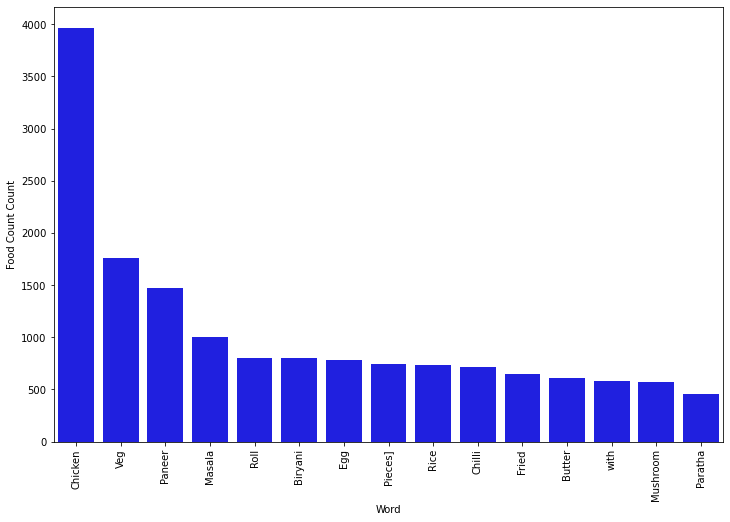

Chicken
Veg
Paneer
Masala
Roll
Biryani
Egg
Pieces]
Rice
Chilli
Fried
Butter
with
Mushroom
Paratha


In [26]:
# Most frequent words counter
import matplotlib.pyplot as plt
import nltk
import seaborn as sns

def counter(text, column_text, quantity, label):
    all_words = ' '.join([i for i in text[column_text]])
    all_words_as_list = all_words.split()
    
    frequency = nltk.FreqDist(all_words_as_list)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),"Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    print(type(df_frequency))
    global types
    types = df_frequency["Word"].values
    print(types)

    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = label + " Count")
    plt.xticks(rotation='vertical')
    plt.show()
    


# Most frequent words 
counter(zomato, "Food Item", 15, "Food Count")
for i in types:
    print(i)

In [27]:
high_rated_food = zomato[zomato["Food Rating"]>4]
high_rated_food
mid_rated_food = zomato[zomato["Food Rating"]==4]
mid_rated_food
low_rated_food = zomato[zomato["Food Rating"]<4]
low_rated_food

,Hotel Name,Food Item,Price,Food Rating,Delivery Rating,Delivery Rating Numbers,Dining Rating,Dining Rating Numbers,Nonveg
35,House Of Biryani,3 Paratha with Kadhai Mushroom,199.00,3,3.7,"5,013",3.2,7,No
39,House Of Biryani,3 Paratha with Chilli Chicken,199.00,3,3.7,"5,013",3.2,7,Yes
43,House Of Biryani,3 Paratha with Chicken Do Pyaza,199.00,3,3.7,"5,013",3.2,7,Yes
58,House Of Biryani,Chicken Garlic,149.00,3,3.7,"5,013",3.2,7,Yes
62,House Of Biryani,Kadhai Veg,160.00,3,3.7,"5,013",3.2,7,No
...,...,...,...,...,...,...,...,...,...
16025,The Chef Lajeez,Paneer Biryani,170.00,3,2.9,20,-,0,No
16036,Mithai Express,Milk Cake [5 Pieces],95.24,3,3.7,253,-,1,No
16040,The Gourmet - Swosti Premium,Roti,99.00,3,3.2,98,3.3,9,No
16041,The Gourmet - Swosti Premium,Curd Rice,225.00,3,3.2,98,3.3,9,No


<class 'pandas.core.frame.DataFrame'>


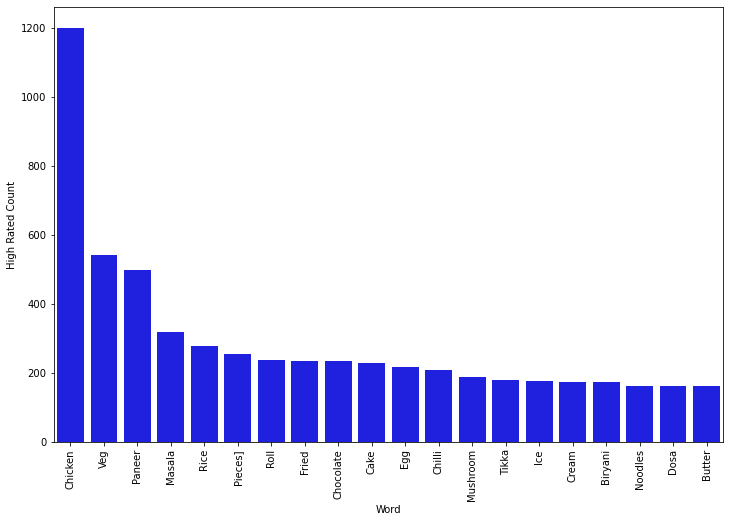

<class 'pandas.core.frame.DataFrame'>


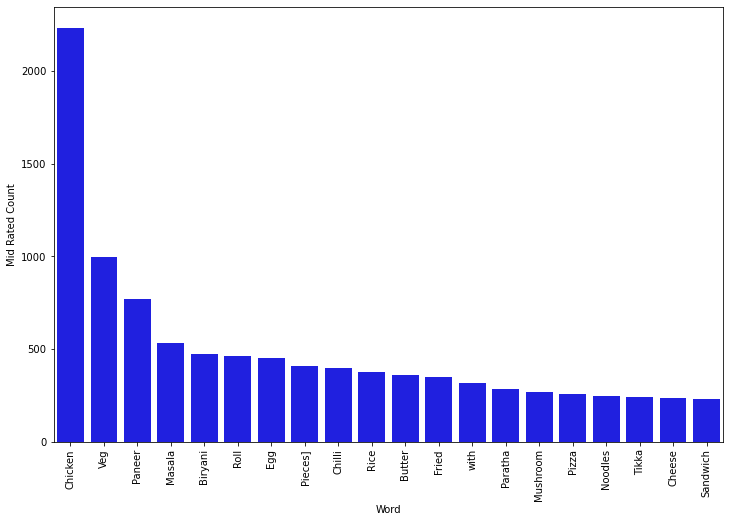

<class 'pandas.core.frame.DataFrame'>


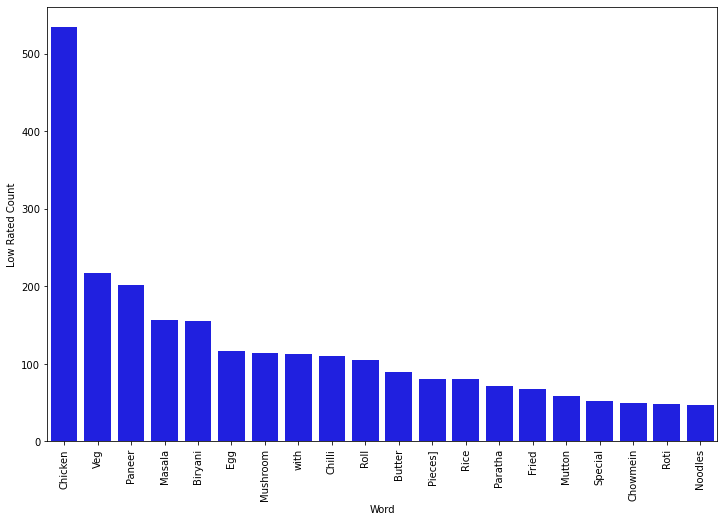

In [28]:
# Most frequent words counter
import matplotlib.pyplot as plt
import nltk
import seaborn as sns

def counter(text, column_text, quantity, label):
    all_words = ' '.join([i for i in text[column_text]])
    all_words_as_list = all_words.split()
    
    frequency = nltk.FreqDist(all_words_as_list)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),"Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    print(type(df_frequency))
    global types
    types = df_frequency["Word"].values
    

    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = label + " Count")
    plt.xticks(rotation='vertical')
    plt.show()
    

cat =[]
# Most frequent words 
counter(high_rated_food, "Food Item", 20, "High Rated")
for i in types:
    cat.append(i)
counter(mid_rated_food, "Food Item", 20, "Mid Rated")
for i in types:
    cat.append(i)
counter(low_rated_food, "Food Item", 20, "Low Rated")
for i in types:
    cat.append(i)

In [29]:
unique_cat = list(set(cat))
for i in unique_cat:
    print(i, cat.count(i))
print("        ")
print("Not in All:")
for i in unique_cat:
    if cat.count(i)<3:
        print(i, cat.count(i))

Roll 3
Paneer 3
with 2
Fried 3
Paratha 2
Ice 1
Cream 1
Chowmein 1
Cake 1
Rice 3
Roti 1
Butter 3
Veg 3
Cheese 1
Chocolate 1
Special 1
Masala 3
Chilli 3
Pieces] 3
Mushroom 3
Tikka 2
Sandwich 1
Noodles 3
Biryani 3
Egg 3
Mutton 1
Chicken 3
Pizza 1
Dosa 1
        
Not in All:
with 2
Paratha 2
Ice 1
Cream 1
Chowmein 1
Cake 1
Roti 1
Cheese 1
Chocolate 1
Special 1
Tikka 2
Sandwich 1
Mutton 1
Pizza 1
Dosa 1


In [30]:
Chicken = ["chicken"]
l = [len([k for k in i.lower().split() if k in Chicken]) for i in zomato["Food Item"]]
m = ["Yes"  if i>0 else "No" for i in l]
zomato["Chicken"]=m
zomato

,Hotel Name,Food Item,Price,Food Rating,Delivery Rating,Delivery Rating Numbers,Dining Rating,Dining Rating Numbers,Nonveg,Chicken
0,House Of Biryani,Chicken Biryani,199.0,4,3.7,"5,013",3.2,7,Yes,Yes
1,House Of Biryani,Veg Fried Rice with Chilli Chicken,199.0,4,3.7,"5,013",3.2,7,Yes,Yes
2,House Of Biryani,3 Paratha with Chicken Hyderabadi,199.0,4,3.7,"5,013",3.2,7,Yes,Yes
3,House Of Biryani,Veg Manchurian,140.0,4,3.7,"5,013",3.2,7,No,No
4,House Of Biryani,Veg Biryani,145.0,4,3.7,"5,013",3.2,7,No,No
...,...,...,...,...,...,...,...,...,...,...
16040,The Gourmet - Swosti Premium,Roti,99.0,3,3.2,98,3.3,9,No,No
16041,The Gourmet - Swosti Premium,Curd Rice,225.0,3,3.2,98,3.3,9,No,No
16042,The Gourmet - Swosti Premium,Moong Dal Khichdi,299.0,3,3.2,98,3.3,9,No,No
16043,The Gourmet - Swosti Premium,Dum Chicken Biryani,549.0,4,3.2,98,3.3,9,Yes,Yes


In [31]:
Paneer = ["paneer"]
l = [len([k for k in i.lower().split() if k in Paneer]) for i in zomato["Food Item"]]
m = ["Yes"  if i>0 else "No" for i in l]
zomato["Paneer"]=m
zomato

,Hotel Name,Food Item,Price,Food Rating,Delivery Rating,Delivery Rating Numbers,Dining Rating,Dining Rating Numbers,Nonveg,Chicken,Paneer
0,House Of Biryani,Chicken Biryani,199.0,4,3.7,"5,013",3.2,7,Yes,Yes,No
1,House Of Biryani,Veg Fried Rice with Chilli Chicken,199.0,4,3.7,"5,013",3.2,7,Yes,Yes,No
2,House Of Biryani,3 Paratha with Chicken Hyderabadi,199.0,4,3.7,"5,013",3.2,7,Yes,Yes,No
3,House Of Biryani,Veg Manchurian,140.0,4,3.7,"5,013",3.2,7,No,No,No
4,House Of Biryani,Veg Biryani,145.0,4,3.7,"5,013",3.2,7,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
16040,The Gourmet - Swosti Premium,Roti,99.0,3,3.2,98,3.3,9,No,No,No
16041,The Gourmet - Swosti Premium,Curd Rice,225.0,3,3.2,98,3.3,9,No,No,No
16042,The Gourmet - Swosti Premium,Moong Dal Khichdi,299.0,3,3.2,98,3.3,9,No,No,No
16043,The Gourmet - Swosti Premium,Dum Chicken Biryani,549.0,4,3.2,98,3.3,9,Yes,Yes,No


In [32]:
Roll = ["roll","chowmein"]
l = [len([k for k in i.lower().split() if k in Roll]) for i in zomato["Food Item"]]
m = ["Yes"  if i>0 else "No" for i in l]
zomato["Roll/Chowemin"]=m
zomato

,Hotel Name,Food Item,Price,Food Rating,Delivery Rating,Delivery Rating Numbers,Dining Rating,Dining Rating Numbers,Nonveg,Chicken,Paneer,Roll/Chowemin
0,House Of Biryani,Chicken Biryani,199.0,4,3.7,"5,013",3.2,7,Yes,Yes,No,No
1,House Of Biryani,Veg Fried Rice with Chilli Chicken,199.0,4,3.7,"5,013",3.2,7,Yes,Yes,No,No
2,House Of Biryani,3 Paratha with Chicken Hyderabadi,199.0,4,3.7,"5,013",3.2,7,Yes,Yes,No,No
3,House Of Biryani,Veg Manchurian,140.0,4,3.7,"5,013",3.2,7,No,No,No,No
4,House Of Biryani,Veg Biryani,145.0,4,3.7,"5,013",3.2,7,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...
16040,The Gourmet - Swosti Premium,Roti,99.0,3,3.2,98,3.3,9,No,No,No,No
16041,The Gourmet - Swosti Premium,Curd Rice,225.0,3,3.2,98,3.3,9,No,No,No,No
16042,The Gourmet - Swosti Premium,Moong Dal Khichdi,299.0,3,3.2,98,3.3,9,No,No,No,No
16043,The Gourmet - Swosti Premium,Dum Chicken Biryani,549.0,4,3.2,98,3.3,9,Yes,Yes,No,No


In [33]:
Biryani = ["biryani"]
l = [len([k for k in i.lower().split() if k in Biryani]) for i in zomato["Food Item"]]
m = ["Yes"  if i>0 else "No" for i in l]
zomato["Biryani"]=m
zomato

,Hotel Name,Food Item,Price,Food Rating,Delivery Rating,Delivery Rating Numbers,Dining Rating,Dining Rating Numbers,Nonveg,Chicken,Paneer,Roll/Chowemin,Biryani
0,House Of Biryani,Chicken Biryani,199.0,4,3.7,"5,013",3.2,7,Yes,Yes,No,No,Yes
1,House Of Biryani,Veg Fried Rice with Chilli Chicken,199.0,4,3.7,"5,013",3.2,7,Yes,Yes,No,No,No
2,House Of Biryani,3 Paratha with Chicken Hyderabadi,199.0,4,3.7,"5,013",3.2,7,Yes,Yes,No,No,No
3,House Of Biryani,Veg Manchurian,140.0,4,3.7,"5,013",3.2,7,No,No,No,No,No
4,House Of Biryani,Veg Biryani,145.0,4,3.7,"5,013",3.2,7,No,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16040,The Gourmet - Swosti Premium,Roti,99.0,3,3.2,98,3.3,9,No,No,No,No,No
16041,The Gourmet - Swosti Premium,Curd Rice,225.0,3,3.2,98,3.3,9,No,No,No,No,No
16042,The Gourmet - Swosti Premium,Moong Dal Khichdi,299.0,3,3.2,98,3.3,9,No,No,No,No,No
16043,The Gourmet - Swosti Premium,Dum Chicken Biryani,549.0,4,3.2,98,3.3,9,Yes,Yes,No,No,Yes


In [34]:
Egg = ["egg"]
l = [len([k for k in i.lower().split() if k in Egg]) for i in zomato["Food Item"]]
m = ["Yes"  if i>0 else "No" for i in l]
zomato["Egg"]=m
zomato

,Hotel Name,Food Item,Price,Food Rating,Delivery Rating,Delivery Rating Numbers,Dining Rating,Dining Rating Numbers,Nonveg,Chicken,Paneer,Roll/Chowemin,Biryani,Egg
0,House Of Biryani,Chicken Biryani,199.0,4,3.7,"5,013",3.2,7,Yes,Yes,No,No,Yes,No
1,House Of Biryani,Veg Fried Rice with Chilli Chicken,199.0,4,3.7,"5,013",3.2,7,Yes,Yes,No,No,No,No
2,House Of Biryani,3 Paratha with Chicken Hyderabadi,199.0,4,3.7,"5,013",3.2,7,Yes,Yes,No,No,No,No
3,House Of Biryani,Veg Manchurian,140.0,4,3.7,"5,013",3.2,7,No,No,No,No,No,No
4,House Of Biryani,Veg Biryani,145.0,4,3.7,"5,013",3.2,7,No,No,No,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16040,The Gourmet - Swosti Premium,Roti,99.0,3,3.2,98,3.3,9,No,No,No,No,No,No
16041,The Gourmet - Swosti Premium,Curd Rice,225.0,3,3.2,98,3.3,9,No,No,No,No,No,No
16042,The Gourmet - Swosti Premium,Moong Dal Khichdi,299.0,3,3.2,98,3.3,9,No,No,No,No,No,No
16043,The Gourmet - Swosti Premium,Dum Chicken Biryani,549.0,4,3.2,98,3.3,9,Yes,Yes,No,No,Yes,No


In [35]:
Mutton = ["mutton"]
l = [len([k for k in i.lower().split() if k in Mutton]) for i in zomato["Food Item"]]
m = ["Yes"  if i>0 else "No" for i in l]
zomato["Mutton"]=m
zomato

,Hotel Name,Food Item,Price,Food Rating,Delivery Rating,Delivery Rating Numbers,Dining Rating,Dining Rating Numbers,Nonveg,Chicken,Paneer,Roll/Chowemin,Biryani,Egg,Mutton
0,House Of Biryani,Chicken Biryani,199.0,4,3.7,"5,013",3.2,7,Yes,Yes,No,No,Yes,No,No
1,House Of Biryani,Veg Fried Rice with Chilli Chicken,199.0,4,3.7,"5,013",3.2,7,Yes,Yes,No,No,No,No,No
2,House Of Biryani,3 Paratha with Chicken Hyderabadi,199.0,4,3.7,"5,013",3.2,7,Yes,Yes,No,No,No,No,No
3,House Of Biryani,Veg Manchurian,140.0,4,3.7,"5,013",3.2,7,No,No,No,No,No,No,No
4,House Of Biryani,Veg Biryani,145.0,4,3.7,"5,013",3.2,7,No,No,No,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16040,The Gourmet - Swosti Premium,Roti,99.0,3,3.2,98,3.3,9,No,No,No,No,No,No,No
16041,The Gourmet - Swosti Premium,Curd Rice,225.0,3,3.2,98,3.3,9,No,No,No,No,No,No,No
16042,The Gourmet - Swosti Premium,Moong Dal Khichdi,299.0,3,3.2,98,3.3,9,No,No,No,No,No,No,No
16043,The Gourmet - Swosti Premium,Dum Chicken Biryani,549.0,4,3.2,98,3.3,9,Yes,Yes,No,No,Yes,No,No


In [36]:
Dessert = ["chocolate", "ice", "cream", "cake"]
l = [len([k for k in i.lower().split() if k in Dessert]) for i in zomato["Food Item"]]
m = ["Yes"  if i>0 else "No" for i in l]
zomato["Dessert"]=m
zomato

,Hotel Name,Food Item,Price,Food Rating,Delivery Rating,Delivery Rating Numbers,Dining Rating,Dining Rating Numbers,Nonveg,Chicken,Paneer,Roll/Chowemin,Biryani,Egg,Mutton,Dessert
0,House Of Biryani,Chicken Biryani,199.0,4,3.7,"5,013",3.2,7,Yes,Yes,No,No,Yes,No,No,No
1,House Of Biryani,Veg Fried Rice with Chilli Chicken,199.0,4,3.7,"5,013",3.2,7,Yes,Yes,No,No,No,No,No,No
2,House Of Biryani,3 Paratha with Chicken Hyderabadi,199.0,4,3.7,"5,013",3.2,7,Yes,Yes,No,No,No,No,No,No
3,House Of Biryani,Veg Manchurian,140.0,4,3.7,"5,013",3.2,7,No,No,No,No,No,No,No,No
4,House Of Biryani,Veg Biryani,145.0,4,3.7,"5,013",3.2,7,No,No,No,No,Yes,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16040,The Gourmet - Swosti Premium,Roti,99.0,3,3.2,98,3.3,9,No,No,No,No,No,No,No,No
16041,The Gourmet - Swosti Premium,Curd Rice,225.0,3,3.2,98,3.3,9,No,No,No,No,No,No,No,No
16042,The Gourmet - Swosti Premium,Moong Dal Khichdi,299.0,3,3.2,98,3.3,9,No,No,No,No,No,No,No,No
16043,The Gourmet - Swosti Premium,Dum Chicken Biryani,549.0,4,3.2,98,3.3,9,Yes,Yes,No,No,Yes,No,No,No


In [37]:
Dessert = ["sandwich", "pizza"]
l = [len([k for k in i.lower().split() if k in Dessert]) for i in zomato["Food Item"]]
m = ["Yes"  if i>0 else "No" for i in l]
zomato["Sandwich/Pizza"]=m
zomato

,Hotel Name,Food Item,Price,Food Rating,Delivery Rating,Delivery Rating Numbers,Dining Rating,Dining Rating Numbers,Nonveg,Chicken,Paneer,Roll/Chowemin,Biryani,Egg,Mutton,Dessert,Sandwich/Pizza
0,House Of Biryani,Chicken Biryani,199.0,4,3.7,"5,013",3.2,7,Yes,Yes,No,No,Yes,No,No,No,No
1,House Of Biryani,Veg Fried Rice with Chilli Chicken,199.0,4,3.7,"5,013",3.2,7,Yes,Yes,No,No,No,No,No,No,No
2,House Of Biryani,3 Paratha with Chicken Hyderabadi,199.0,4,3.7,"5,013",3.2,7,Yes,Yes,No,No,No,No,No,No,No
3,House Of Biryani,Veg Manchurian,140.0,4,3.7,"5,013",3.2,7,No,No,No,No,No,No,No,No,No
4,House Of Biryani,Veg Biryani,145.0,4,3.7,"5,013",3.2,7,No,No,No,No,Yes,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16040,The Gourmet - Swosti Premium,Roti,99.0,3,3.2,98,3.3,9,No,No,No,No,No,No,No,No,No
16041,The Gourmet - Swosti Premium,Curd Rice,225.0,3,3.2,98,3.3,9,No,No,No,No,No,No,No,No,No
16042,The Gourmet - Swosti Premium,Moong Dal Khichdi,299.0,3,3.2,98,3.3,9,No,No,No,No,No,No,No,No,No
16043,The Gourmet - Swosti Premium,Dum Chicken Biryani,549.0,4,3.2,98,3.3,9,Yes,Yes,No,No,Yes,No,No,No,No


In [38]:
Duplicate = list(zomato.duplicated(keep=False).values)
Duplicate_letter = ["Yes" if i ==True else "No" for i in Duplicate]
zomato["Recommened"] = Duplicate_letter
pd.set_option('display.max_rows', 500)
zomato.head()

,Hotel Name,Food Item,Price,Food Rating,Delivery Rating,Delivery Rating Numbers,Dining Rating,Dining Rating Numbers,Nonveg,Chicken,Paneer,Roll/Chowemin,Biryani,Egg,Mutton,Dessert,Sandwich/Pizza,Recommened
0,House Of Biryani,Chicken Biryani,199.0,4,3.7,"5,013",3.2,7,Yes,Yes,No,No,Yes,No,No,No,No,Yes
1,House Of Biryani,Veg Fried Rice with Chilli Chicken,199.0,4,3.7,"5,013",3.2,7,Yes,Yes,No,No,No,No,No,No,No,Yes
2,House Of Biryani,3 Paratha with Chicken Hyderabadi,199.0,4,3.7,"5,013",3.2,7,Yes,Yes,No,No,No,No,No,No,No,Yes
3,House Of Biryani,Veg Manchurian,140.0,4,3.7,"5,013",3.2,7,No,No,No,No,No,No,No,No,No,Yes
4,House Of Biryani,Veg Biryani,145.0,4,3.7,"5,013",3.2,7,No,No,No,No,Yes,No,No,No,No,Yes


In [39]:
bool_series = zomato.duplicated(keep='first')
final_zomato = zomato[~bool_series] 
pd.set_option('display.max_rows', 500)
final_zomato.head()

,Hotel Name,Food Item,Price,Food Rating,Delivery Rating,Delivery Rating Numbers,Dining Rating,Dining Rating Numbers,Nonveg,Chicken,Paneer,Roll/Chowemin,Biryani,Egg,Mutton,Dessert,Sandwich/Pizza,Recommened
0,House Of Biryani,Chicken Biryani,199.0,4,3.7,"5,013",3.2,7,Yes,Yes,No,No,Yes,No,No,No,No,Yes
1,House Of Biryani,Veg Fried Rice with Chilli Chicken,199.0,4,3.7,"5,013",3.2,7,Yes,Yes,No,No,No,No,No,No,No,Yes
2,House Of Biryani,3 Paratha with Chicken Hyderabadi,199.0,4,3.7,"5,013",3.2,7,Yes,Yes,No,No,No,No,No,No,No,Yes
3,House Of Biryani,Veg Manchurian,140.0,4,3.7,"5,013",3.2,7,No,No,No,No,No,No,No,No,No,Yes
4,House Of Biryani,Veg Biryani,145.0,4,3.7,"5,013",3.2,7,No,No,No,No,Yes,No,No,No,No,Yes


In [40]:
final_zomato.reset_index(inplace = True)
pd.set_option('display.max_rows', 500)

final_zomato

,index,Hotel Name,Food Item,Price,Food Rating,Delivery Rating,Delivery Rating Numbers,Dining Rating,Dining Rating Numbers,Nonveg,Chicken,Paneer,Roll/Chowemin,Biryani,Egg,Mutton,Dessert,Sandwich/Pizza,Recommened
0,0,House Of Biryani,Chicken Biryani,199.0,4,3.7,"5,013",3.2,7,Yes,Yes,No,No,Yes,No,No,No,No,Yes
1,1,House Of Biryani,Veg Fried Rice with Chilli Chicken,199.0,4,3.7,"5,013",3.2,7,Yes,Yes,No,No,No,No,No,No,No,Yes
2,2,House Of Biryani,3 Paratha with Chicken Hyderabadi,199.0,4,3.7,"5,013",3.2,7,Yes,Yes,No,No,No,No,No,No,No,Yes
3,3,House Of Biryani,Veg Manchurian,140.0,4,3.7,"5,013",3.2,7,No,No,No,No,No,No,No,No,No,Yes
4,4,House Of Biryani,Veg Biryani,145.0,4,3.7,"5,013",3.2,7,No,No,No,No,Yes,No,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11444,16040,The Gourmet - Swosti Premium,Roti,99.0,3,3.2,98,3.3,9,No,No,No,No,No,No,No,No,No,No
11445,16041,The Gourmet - Swosti Premium,Curd Rice,225.0,3,3.2,98,3.3,9,No,No,No,No,No,No,No,No,No,No
11446,16042,The Gourmet - Swosti Premium,Moong Dal Khichdi,299.0,3,3.2,98,3.3,9,No,No,No,No,No,No,No,No,No,No
11447,16043,The Gourmet - Swosti Premium,Dum Chicken Biryani,549.0,4,3.2,98,3.3,9,Yes,Yes,No,No,Yes,No,No,No,No,No


In [41]:
final_zomato = final_zomato.drop(["index"], axis =1)
final_zomato

,Hotel Name,Food Item,Price,Food Rating,Delivery Rating,Delivery Rating Numbers,Dining Rating,Dining Rating Numbers,Nonveg,Chicken,Paneer,Roll/Chowemin,Biryani,Egg,Mutton,Dessert,Sandwich/Pizza,Recommened
0,House Of Biryani,Chicken Biryani,199.0,4,3.7,"5,013",3.2,7,Yes,Yes,No,No,Yes,No,No,No,No,Yes
1,House Of Biryani,Veg Fried Rice with Chilli Chicken,199.0,4,3.7,"5,013",3.2,7,Yes,Yes,No,No,No,No,No,No,No,Yes
2,House Of Biryani,3 Paratha with Chicken Hyderabadi,199.0,4,3.7,"5,013",3.2,7,Yes,Yes,No,No,No,No,No,No,No,Yes
3,House Of Biryani,Veg Manchurian,140.0,4,3.7,"5,013",3.2,7,No,No,No,No,No,No,No,No,No,Yes
4,House Of Biryani,Veg Biryani,145.0,4,3.7,"5,013",3.2,7,No,No,No,No,Yes,No,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11444,The Gourmet - Swosti Premium,Roti,99.0,3,3.2,98,3.3,9,No,No,No,No,No,No,No,No,No,No
11445,The Gourmet - Swosti Premium,Curd Rice,225.0,3,3.2,98,3.3,9,No,No,No,No,No,No,No,No,No,No
11446,The Gourmet - Swosti Premium,Moong Dal Khichdi,299.0,3,3.2,98,3.3,9,No,No,No,No,No,No,No,No,No,No
11447,The Gourmet - Swosti Premium,Dum Chicken Biryani,549.0,4,3.2,98,3.3,9,Yes,Yes,No,No,Yes,No,No,No,No,No


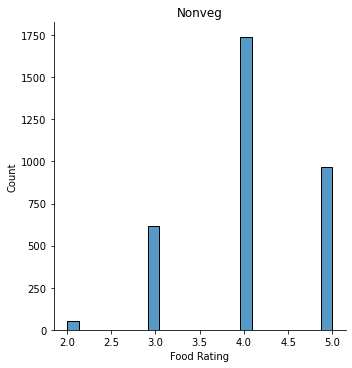

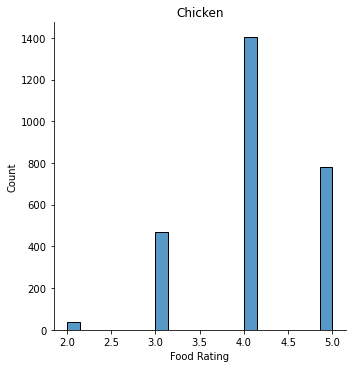

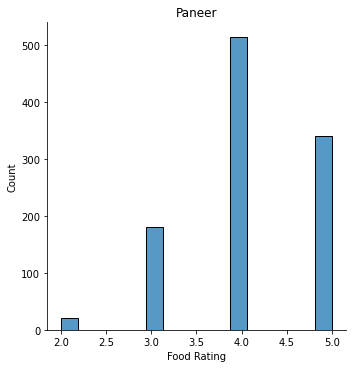

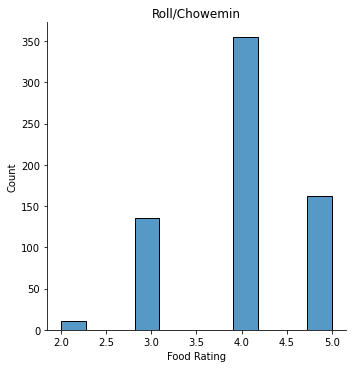

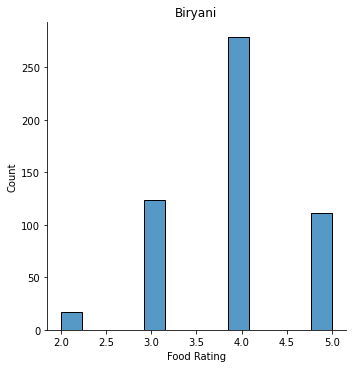

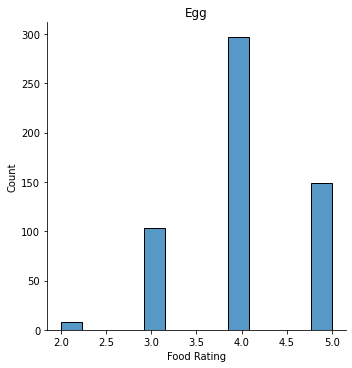

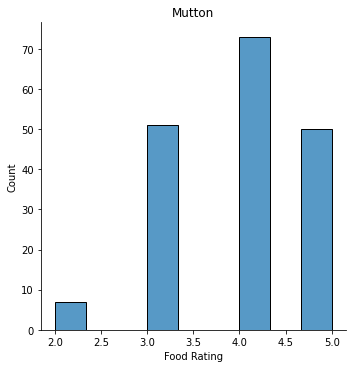

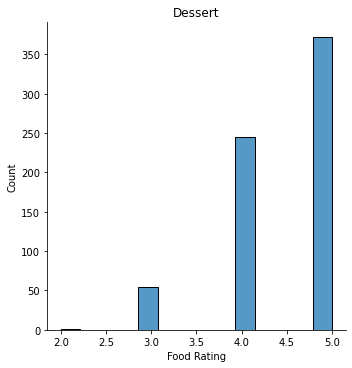

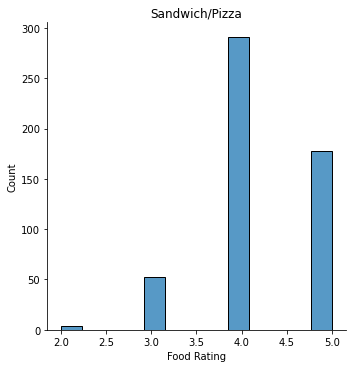

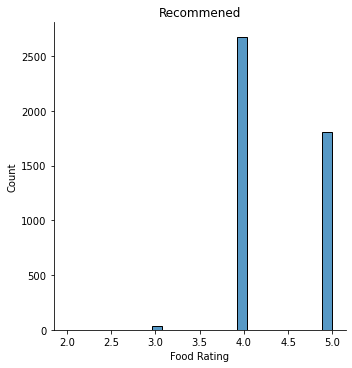

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
zomato_columns = list(final_zomato.columns)
for i in zomato_columns[8:len(zomato_columns)]:
    j = final_zomato[final_zomato[i]=="Yes"]
    fig = sns.displot(x = "Food Rating", data = j, kind= "hist")
    plt.title(i)
    plt.show()

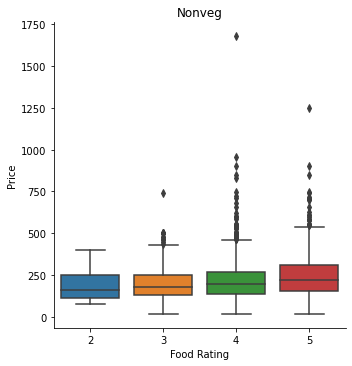

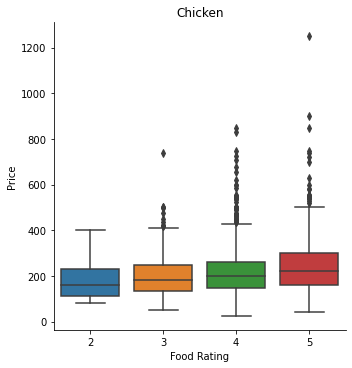

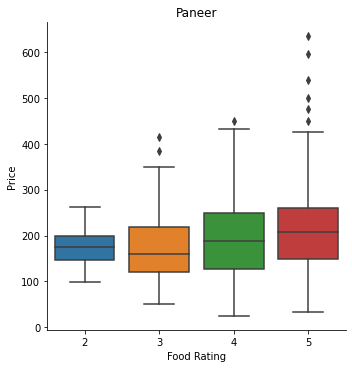

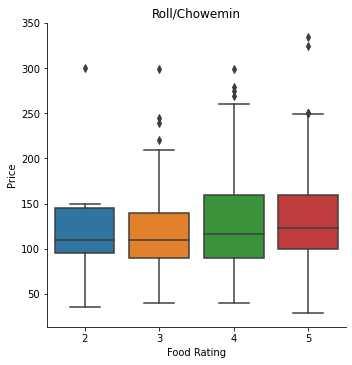

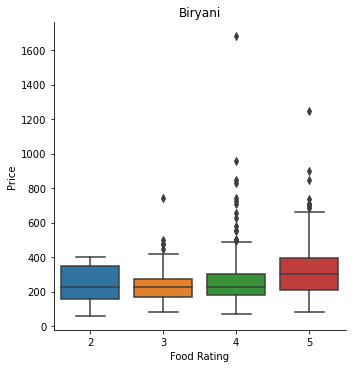

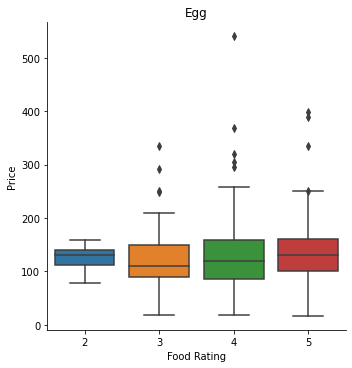

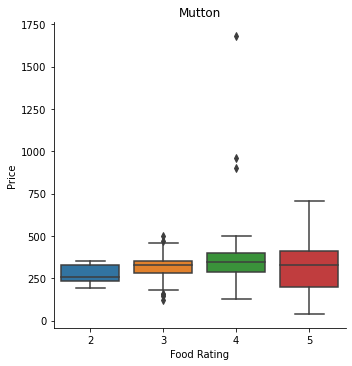

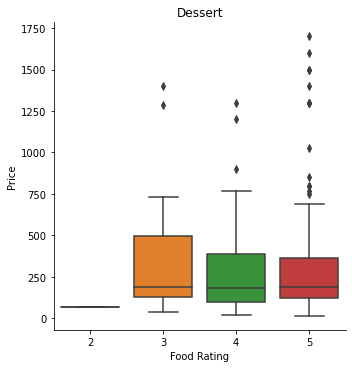

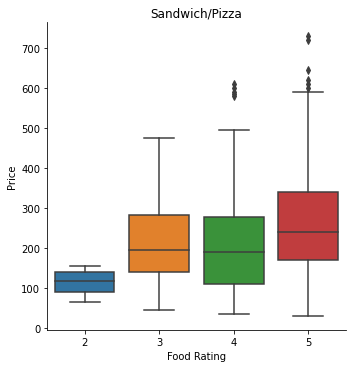

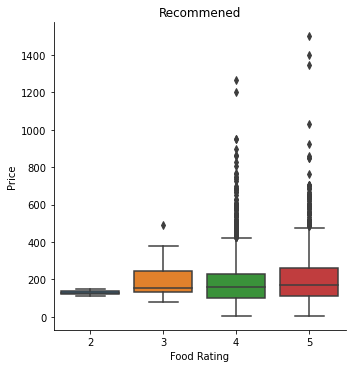

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
zomato_columns = list(final_zomato.columns)
for i in zomato_columns[8:len(zomato_columns)]:
    j = final_zomato[final_zomato[i]=="Yes"]
    fig = sns.catplot(x = "Food Rating", y = "Price", data = j, kind= "box")
    plt.title(i)
    plt.show()

In [44]:
price_list = list(final_zomato["Price"])

for i in range(len(price_list)):
    for j in range(int(price_list[i]),2000):
        if j%50==0:
            price_list.insert(i,j)
            price_list.pop(i+1)
            break
        else:
            continue
final_zomato["New Price"] = price_list
final_zomato

,Hotel Name,Food Item,Price,Food Rating,Delivery Rating,Delivery Rating Numbers,Dining Rating,Dining Rating Numbers,Nonveg,Chicken,Paneer,Roll/Chowemin,Biryani,Egg,Mutton,Dessert,Sandwich/Pizza,Recommened,New Price
0,House Of Biryani,Chicken Biryani,199.0,4,3.7,"5,013",3.2,7,Yes,Yes,No,No,Yes,No,No,No,No,Yes,200
1,House Of Biryani,Veg Fried Rice with Chilli Chicken,199.0,4,3.7,"5,013",3.2,7,Yes,Yes,No,No,No,No,No,No,No,Yes,200
2,House Of Biryani,3 Paratha with Chicken Hyderabadi,199.0,4,3.7,"5,013",3.2,7,Yes,Yes,No,No,No,No,No,No,No,Yes,200
3,House Of Biryani,Veg Manchurian,140.0,4,3.7,"5,013",3.2,7,No,No,No,No,No,No,No,No,No,Yes,150
4,House Of Biryani,Veg Biryani,145.0,4,3.7,"5,013",3.2,7,No,No,No,No,Yes,No,No,No,No,Yes,150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11444,The Gourmet - Swosti Premium,Roti,99.0,3,3.2,98,3.3,9,No,No,No,No,No,No,No,No,No,No,100
11445,The Gourmet - Swosti Premium,Curd Rice,225.0,3,3.2,98,3.3,9,No,No,No,No,No,No,No,No,No,No,250
11446,The Gourmet - Swosti Premium,Moong Dal Khichdi,299.0,3,3.2,98,3.3,9,No,No,No,No,No,No,No,No,No,No,300
11447,The Gourmet - Swosti Premium,Dum Chicken Biryani,549.0,4,3.2,98,3.3,9,Yes,Yes,No,No,Yes,No,No,No,No,No,550


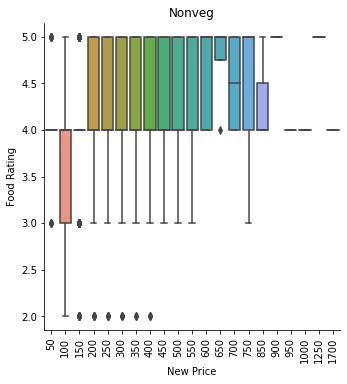

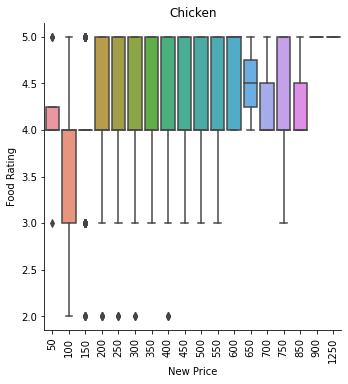

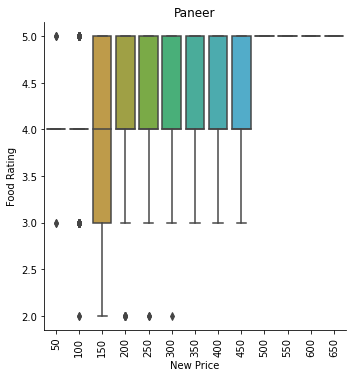

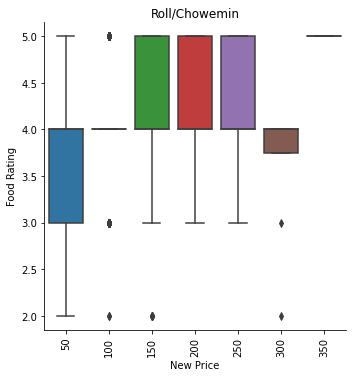

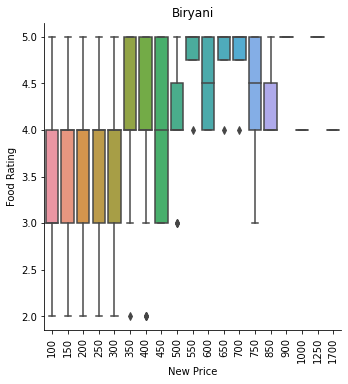

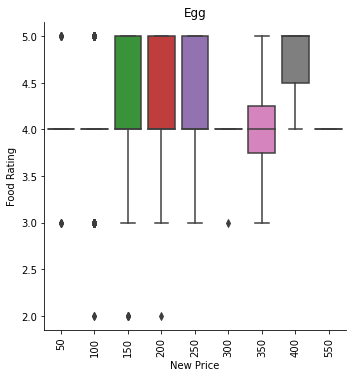

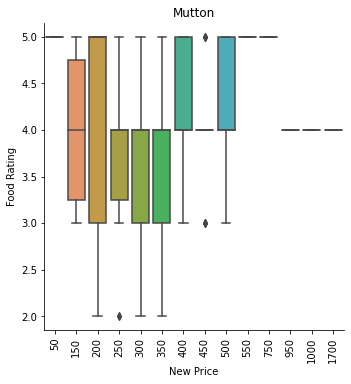

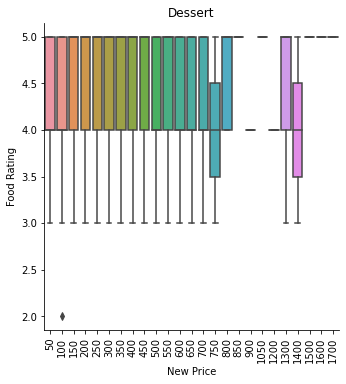

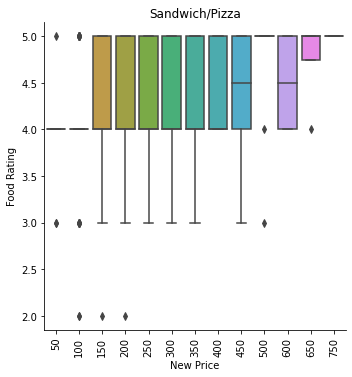

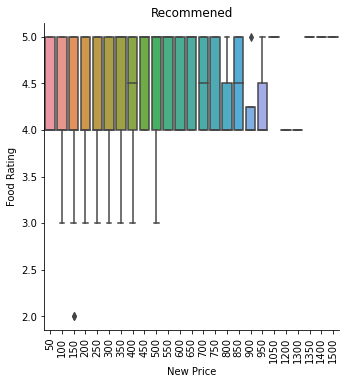

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
zomato_columns = list(final_zomato.columns)
for i in zomato_columns[8:len(zomato_columns)-1]:
    j = final_zomato[final_zomato[i]=="Yes"]
    fig = sns.catplot(x = "New Price", y = "Food Rating", data = j, kind= "box")
    plt.title(i)
    plt.xticks(rotation=90)
    plt.show()